<a href="https://colab.research.google.com/github/K-Chorna02/DST_Assessment_2/blob/main/EDA_initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This uses CNNs with PyTorch and CIFAR-10, we explore using EDA.
Website: https://medium.com/@vangaripallavi27/exploratory-data-analysis-on-cifar-10-dataset-using-python-d5f1b0d6bcdc

CIFAR-10 dataset: contains images from the following categories - planes, cars, birds, cats, etc.
CIFAR-10 data set can be found :https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10

In [ ]:

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# Exploratory Data Analysis (EDA)

## Shape of the Data
First, let’s check the shape of the training and testing datasets:

In [ ]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


Visualisations:

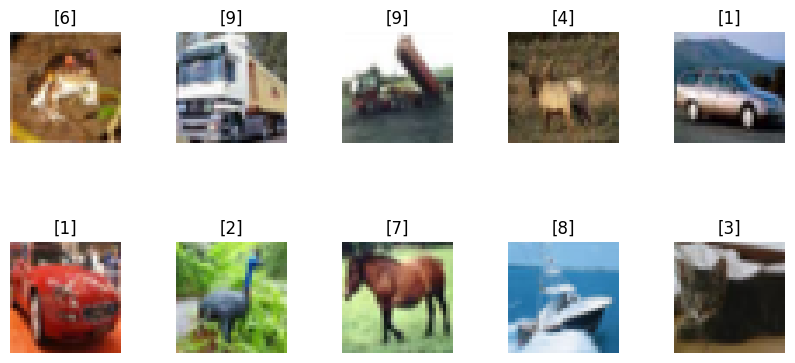

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
axes = axes.ravel()
for i in np.arange(0, 10):
    axes[i].imshow(X_train[i])
    axes[i].set_title(y_train[i])
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

## Class distribution

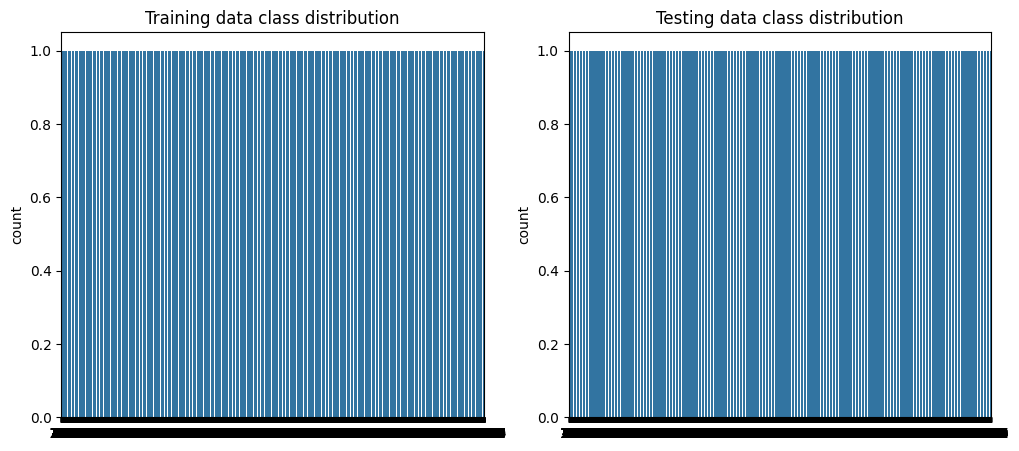

In [ ]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
#sns.countplot(y_train.flatten(), ax=axes[0])
#axes[0].set_title("Training data class distribution")
#sns.countplot(y_test.flatten(), ax=axes[1])
#axes[1].set_title("Testing data class distribution")
#plt.show()


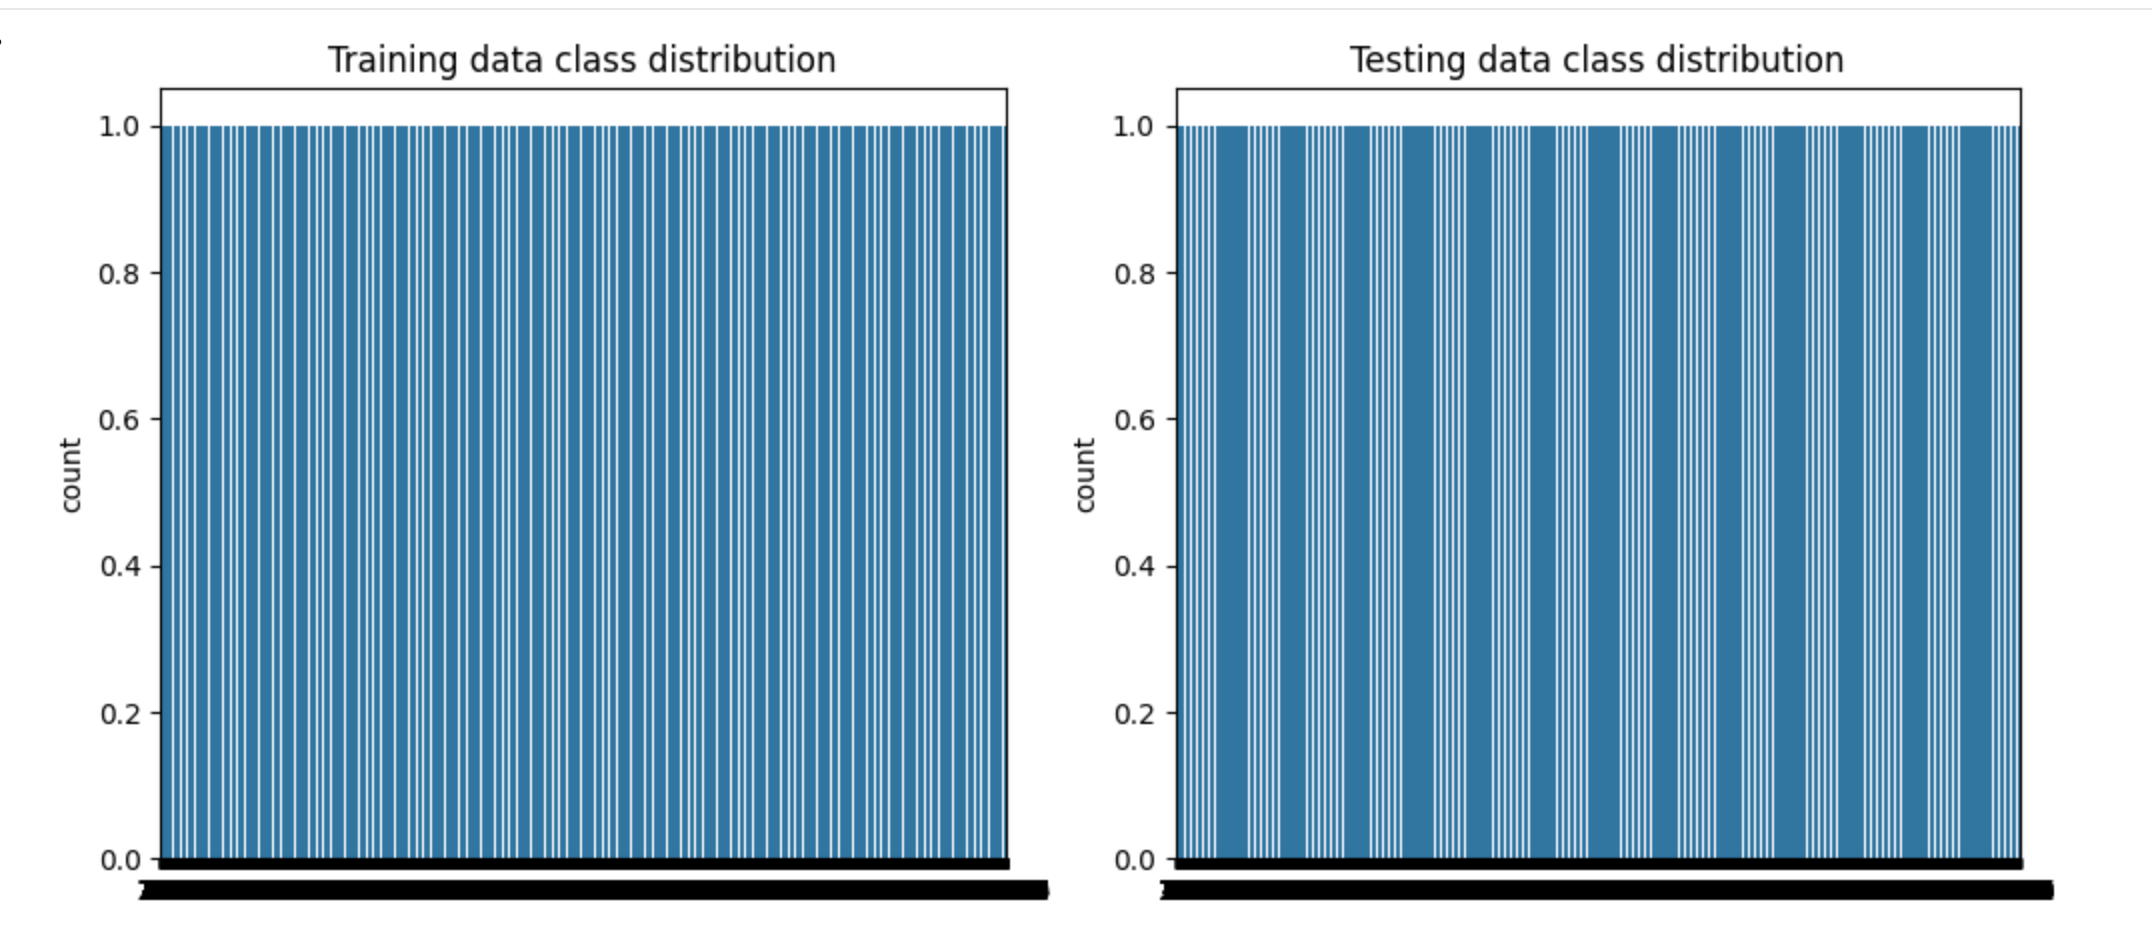
The above is an image of what the code off medium ran, I wasn't quite sure how to interpret this and will look into better EDA methods

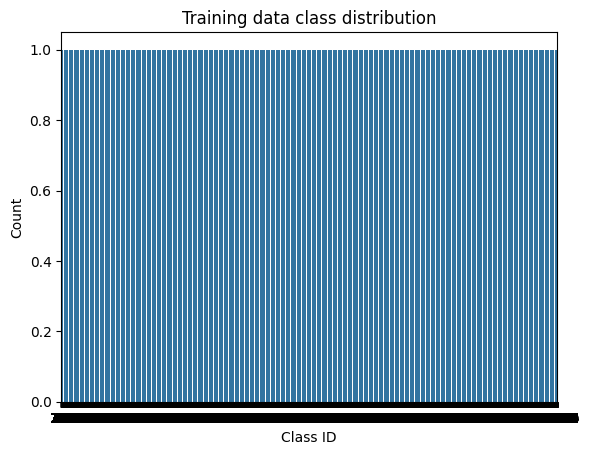

The above take approx 5 mins to run as they're cycling through all images.

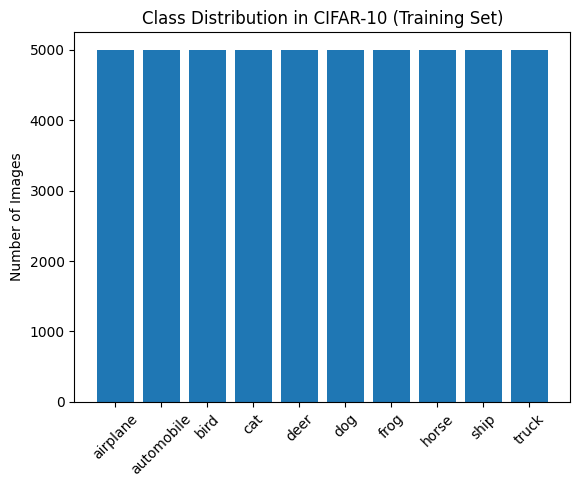

In [ ]:
# CIFAR-10 class names:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Count class frequencies
train_counts = np.bincount(y_train.flatten(), minlength=10)

# Simple bar plot
plt.bar(class_names, train_counts)
plt.title("Class Distribution in CIFAR-10 (Training Set)")
plt.xticks(rotation=45)
plt.ylabel("Number of Images")
plt.show()


## Pixel Value Distribution
We plot the distribution of pixel values in the images:

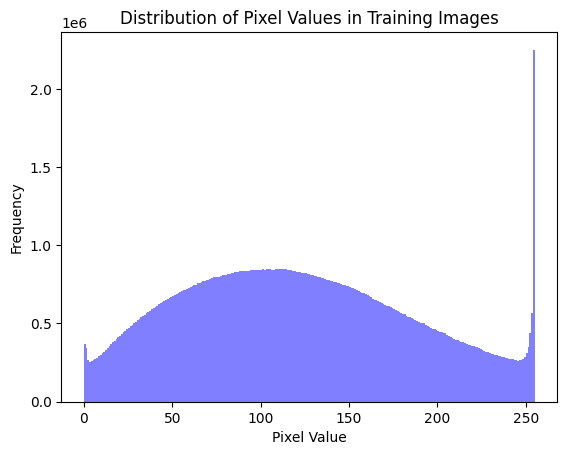

In [ ]:
plt.hist(X_train.flatten(), bins=255, color='blue', alpha=0.5)
plt.title("Distribution of Pixel Values in Training Images")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

## Normalizing
To normalize the pixel values of the images to be in the range [0, 1], use the following code:

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## One-hot encoding


In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


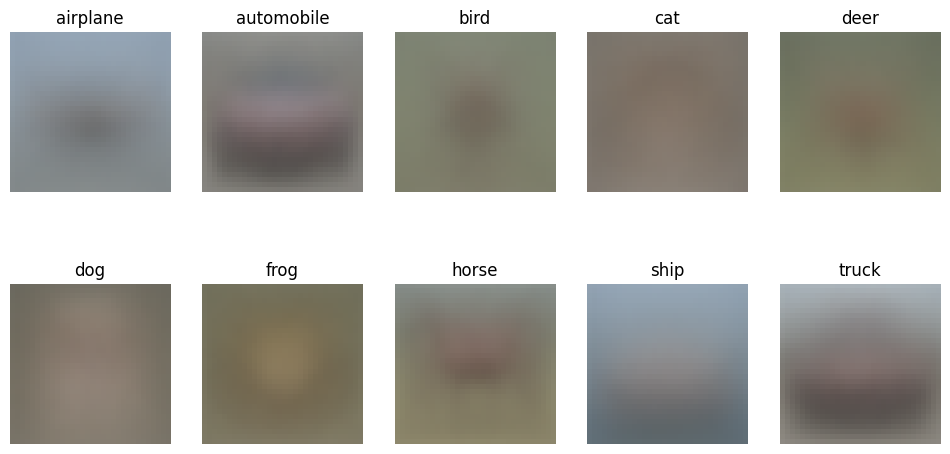

In [ ]:
#Mean image per class
class_means = [X_train[y_train.argmax(axis=1)==i].mean(axis=0) for i in range(10)]

plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(class_means[i])
    plt.title(class_names[i])
    plt.axis('off')
plt.show()


Though the above may look meaningless, this may be useful for determining backgrounds for images.

# Further reading
https://github.com/Bigeco/lvi-cifar100-classifier-pytorch